# Ridge Regression and Bayesian Methods


**_Author: Khal Makhoul, W.P.G.Peterson_**

**_Reviewer: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points =  80 points**



## Assignment Overview

This assignment will test your ability to code your own version of ridge-regularized regression in `Python`. Ridge Regression offers a way to mitigate some of the weaknesses of Least Squares Linear Regression to build more robust models. This assignment draws upon and presupposes the knowledge found in the lectures for Module 13.  

The assignment also builds upon the work performed in the module 13 assignment "*Linear Regression - Least Squares*". The data used will be the same. Though the last assignment tested your ability to read data into `Pandas` from a `.csv`. Those fundamental processes will not be directly tested here.


This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Test both Python and mathematical competencies in ridge regression
- Calculate ridge regression weights using linear algebra
- Understand how to standardize data and its working 
- Process data for regularized methods 
- Implement ridge regression from scratch
- Use Naïve grid search to optimize regularization and set hyperparameters
- Familiarize with the concept of hyperparameter tuning

## Index: 

#### Ridge Regression and Bayesian Methods

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)

## Ridge Regression and Bayesian Methods


For this assignment, we will use a regression model on a housing price dataset to predict the price of a house based on its living area above the ground. More information about this dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

Before coding an algorithm, we will take a look at our data using Python's `pandas`. For visualizations, we'll use `matplotlib`.
Let's import the necessary libraries and load the datasets by using the pandas pd.read_csv() function.



In [5]:
### Import the necessary modules

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  

### Read in the data
tr_path = 'data/train.csv'

data = pd.read_csv(tr_path)  

We begin by performing some basic exploratory data analysis by using the function head() and the attribute columns.


In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

Which column has the most "null" values? Assign name of the column as string to `ans1a`.
How many nulls are in that column? Assign number as int to `ans1b`.

**NOTE:** To find the column that has the higher number of null values, use the `idxmin()` function.

In [7]:
### GRADED
###
### YOUR CODE HERE
###
print(data.count().idxmin())
print(data['PoolQC'].isna().sum())

ans1a = 'PoolQC'
ans1b = 1453


PoolQC
1453


In [8]:
ans1a

'PoolQC'

In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, let's plot the relationship between our variables of interest: the price for each house and the above ground living area in square feet.

We can do so by creating a scatter plot using matplotlib.

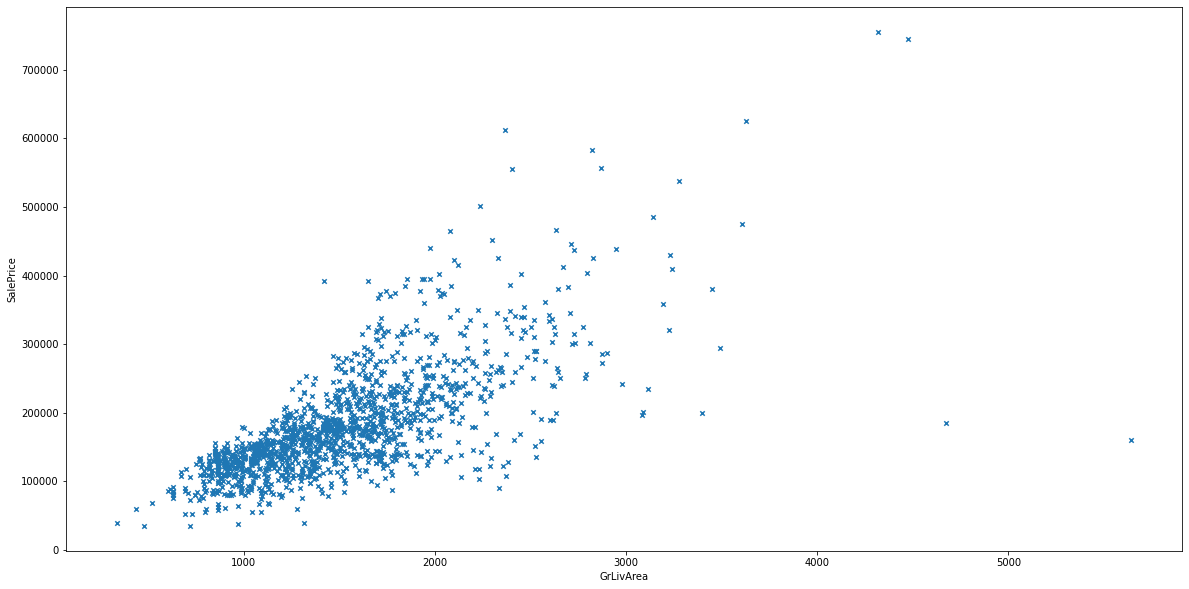

In [10]:

data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

Create a subset of our dataframe below containing only the "Street" and "Alley" columns from the `data`.
Assign the new dataframe to 'ans2'

In [11]:
### GRADED

### YOUR SOLUTION HERE
ans2 = data[['Street','Alley']]
ans2
###
### YOUR CODE HERE
###


,Street,Alley
0,Pave,NaN
1,Pave,NaN
2,Pave,NaN
3,Pave,NaN
4,Pave,NaN
...,...,...
1455,Pave,NaN
1456,Pave,NaN
1457,Pave,NaN
1458,Pave,NaN


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "code"></a>
### Coding Ridge Regression   

#### Preprocessing
Before implementing ridge regression, it is important to mean-center our target variable and mean-center and standardize observations. We will do this by using the following formulas:  
#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$

Where $\bar{X}$ is the sample mean of X and $s_{X}$ is the sample standard deviation of X.  

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"


[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*5 points*
    
Why are the centering/standardization transformations described above important for ridge regression?
- a) Regression works best when values are unitless
- b) The transformations makes the regression more interpretable
- c) Ridge penalizes large coefficients; the transformations make the coefficients of similar scales
- d) It isn't important

Assign character associated with your choice as a string to `ans3`.

In [13]:
### GRADED

### YOUR ANSWER BELOW

ans3 = 'c'

###
### YOUR CODE HERE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*10 points*

Standardized values can be calculated using the following formula:

$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}.$$

Define a function "standardize" that accepts, as input a list of numbers and returns a list where those values have been standardized. Please use the NumPy function `std()` for calculating standard deviation

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom".  
If your answer does not match the example answer, check the default degrees of freedom in your standard deviation function.

In [15]:
### GRADED

### YOUR ANSWER BELOW

def standardize( num_list):
    """
    Standardize the given list of numbers
    
    Positional arguments:
        num_list -- a list of numbers
    
    Example:
        num_list = [1,2,3,3,4,4,5,5,5,5,5]
        nl_std = standardize(num_list)
        print(np.round(nl_std,2))
        #--> np.array([-2.11, -1.36, -0.61, -0.61,  
                0.14,  0.14,  0.88,  0.88,  0.88,
                0.88,  0.88])
    
    NOTE: the sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    """
    mean = np.mean(num_list)
    std = np.std(num_list,0)
    standardized_list = (num_list-mean)/std
    return np.round(standardized_list,2)

###
### YOUR CODE HERE
###
standardize( num_list = [1,2,3,3,4,4,5,5,5,5,5])

array([-2.11, -1.36, -0.61, -0.61,  0.14,  0.14,  0.88,  0.88,  0.88,
        0.88,  0.88])

In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Below we will create a function which will preprocess our data by performing:
* mean subtraction from $y$,
* dimension standardization for $x$.

The formulas to Mean Center Target and Standardize Observations are given above.

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"  
If your answer does not match the example answer, check the default degrees of freedom in your standard deviation function.

[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*10 points*

Code a function called "preprocess_for_regularization" that accepts, as input, the DataFrame, a `y_column_name` input and an `x_column_names` input input
Your function should preprocess our data by performing:
- mean subtraction from $y$,
- dimension standardization for $x$

In [18]:
### GRADED
### YOUR ANSWER BELOW
def preprocess_for_regularization(data, y_column_name, x_column_names):
    """
    Perform mean subtraction and dimension standardization on data
        
    Positional argument:
        data -- a pandas dataframe of the data to pre-process
        y_column_name -- the name (string) of the column that contains
            the target of the training data.
        x_column_names -- a *list* of the names of columns that contain the
            observations to be standardized
        
    Returns:
        Return a DataFrame consisting only of the columns included
        in `y_column_name` and `x_column_names`.
        Where the y_column has been mean-centered, and the
        x_columns have been mean-centered/standardized.
        
     NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    
    If your answer does not match the example answer,
    check the default degrees of freedom in your standard deviation function.
    
    Example:
        data = pd.read_csv(tr_path).head()
        prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
        
        print(prepro_data) #-->
                   GrLivArea  YearBuilt  SalePrice
                0  -0.082772   0.716753     7800.0
                1  -1.590161  -0.089594   -19200.0
                2   0.172946   0.657024    22800.0
                3  -0.059219  -1.911342   -60700.0
                4   1.559205   0.627159    49300.0
       """
    # Create list of all columns
    toRetCol = x_column_names + [y_column_name]
    
    # subset dataframe
    toRet = data[toRetCol].copy() # For "setting with copy" warning
    
    # calculate mean of y, then subtract from all y's
    y_mean = np.mean(data[y_column_name])
    
    toRet[y_column_name] = data[y_column_name].apply(lambda x: x - y_mean)
    
    # Calc mean and std for every column in x
    # Then apply standardization
    for column in x_column_names:
        mean = np.mean(data[column])
        std = np.std(data[column])
        
        toRet[column] = data[column].apply(lambda x: (x - mean)/std)
    
    return toRet
prepro_data = preprocess_for_regularization(data.head(),'SalePrice', ['GrLivArea','YearBuilt'])
print(prepro_data)

   GrLivArea  YearBuilt  SalePrice
0  -0.082772   0.716753     7800.0
1  -1.590161  -0.089594   -19200.0
2   0.172946   0.657024    22800.0
3  -0.059219  -1.911342   -60700.0
4   1.559205   0.627159    49300.0


In [149]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, you'll implement the equation for ridge regression using the closed form equation:  

$$w_{RR}=(\lambda+X^TX)^{-1}X^Ty$$  

The function will be very similar to the function you wrote for Least Squares Regression with a slightly different matrix to invert.  

NB: Many `numpy` matrix functions will be useful. e.g. `np.matmul`, `np.linalg.inv`, `np.ones`, `np.transpose`, and `np.identity`.

The main change from Least Squares Regression is that $\lambda$ is a parameter *we* must set. This is different from the $w$ parameters that we calculate from either closed form or approximation algorithms.  

We will address tuning parameters such as $\lambda$ in the next section.  

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*10 points*

Code a function called "ridge_regression_weights" that takes, as input, three inputs: two matricies corresponding to the x inputs and y target and a number (int or float) for the lambda parameter

Your function should return a numpy array of regression weights

 The following steps must be accomplished:

Ensure the number of rows of each the X matrix is greater than the number of columns.
If not, transpose the matrix.
Ultimately, the y input will have length n. Thus the x input should be in the shape n-by-p

*Prepend* an n-by-1 column of ones to the input_x matrix

Use the above equation to calculate the least squares weights. This will involve creating the lambda matrix - a p+1-by-p+1 matrix with the "lambda_param" on the diagonal

In [20]:
### GRADED

### YOUR ANSWER BELOW

def ridge_regression_weights(input_x, output_y, lambda_param):
    """Calculate ridge regression least squares weights.
    
    Positional arguments:
        input_x -- 2-d matrix of input data
        output_y -- 1-d numpy array of target values
        lambda_param -- lambda parameter that controls how heavily
            to penalize large weight values
        
    Example:
        training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        lambda_param = 10
        
        rrw = ridge_regression_weights(training_x, training_y, lambda_param)
        
        print(rrw) #--> np.array([-576.67947107,   77.45913349,   31.50189177])
        print(rrw[2]) #--> 31.50189177
        
    Assumptions:
        -- output_y is a vector whose length is the same as the
        number of observations in input_x
        -- lambda_param has a value greater than 0
    """
    
    # Check to ensure dataframe is long not wide
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    # Create column of ones
    ones = np.ones((len(output_y), 1), dtype=int)
    
    # Add column of ones to X
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    # Create square lambda_matrix, with size equal to number of columns in X
    lambda_matrix = lambda_param * np.identity(min(augmented_x.shape))
    
    # Invert lambda + dot-prod of x and transposed x
    inv = np.linalg.inv(lambda_matrix + np.matmul(np.transpose(augmented_x), augmented_x))
    
    # dot-prod of inverted matrix and transposed X
    left_multiplier = np.matmul(inv , np.transpose(augmented_x))
    
    # final dot-prod with the ys
    weights = np.matmul(left_multiplier, output_y)
    
    return weights
training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
lambda_param = 10
        
rrw = ridge_regression_weights(training_x, training_y, lambda_param)
        
print(rrw) #--> np.array([-576.67947107,   77.45913349,   31.50189177])
print(rrw[2])
### YOUR CODE HERE
###


[-576.67947107   77.45913349   31.50189177]
31.501891773638256


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Selecting the $\lambda$ parameter

For our final function before looking at the `sklearn` implementation of ridge regression, we will create a hyperparameter tuning algorithm.  

In ridge regression, we must pick a value for $\lambda$. We have some intuition about $\lambda$ from the equations that define it: small values tend to emulate the results from Least Squares, while large values will reduce the dimensionality of the problem. But the choice of $\lambda$ can be motivated with a more precise quantitative treatment.

Eventually, we will look to choose the value of $\lambda$ that minimizes the validation error, which we will determine using $k$-fold cross-validation.

For this example, we will solve a simpler problem on finding a value that minimizes the list returned by the function.

In [13]:
### Example of hiden function below:

### `hidden` takes a single number as a parameter (int or float) and returns a list of 1000 numbers
### the input must be between 0 and 50 exclusive

def hidden(hp):
    if (hp<=0) or (hp >= 50):
        print("input out of bounds")
    
    nums = np.logspace(0,5,num = 1000)
    vals = nums** 43.123985172351235134687934
    
    user_vals = nums** hp
    
    return vals-user_vals

In [17]:
hidden(49)

array([ 0.00000000e+000, -1.15166606e-001, -3.91873562e-001,
       -1.00044318e+000, -2.27118222e+000, -4.83557539e+000,
       -9.88736530e+000, -1.96626994e+001, -3.83190704e+001,
       -7.35378477e+001, -1.39435947e+002, -2.61840006e+002,
       -4.87814360e+002, -9.02832786e+002, -1.66166074e+003,
       -3.04379005e+003, -5.55277736e+003, -1.00939859e+004,
       -1.82921725e+004, -3.30582388e+004, -5.95994854e+004,
       -1.07218565e+005, -1.92513855e+005, -3.45068095e+005,
       -6.17551935e+005, -1.10365585e+006, -1.96989493e+006,
       -3.51198471e+006, -6.25471512e+006, -1.11287927e+007,
       -1.97838191e+007, -3.51419617e+007, -6.23770225e+007,
       -1.10645098e+008, -1.96142736e+008, -3.47509110e+008,
       -6.15366005e+008, -1.08916035e+009, -1.92689157e+009,
       -3.40756830e+009, -6.02375301e+009, -1.06447964e+010,
       -1.88047031e+010, -3.32096958e+010, -5.86330047e+010,
       -1.03492058e+011, -1.82628102e+011, -3.22204322e+011,
       -5.68336016e+011,

Run the above cell and test out the functionality of `hidden`. Remember, it takes a single number between 0 and 50 as an argument.
[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*10 points*

Code a function called "minimize" that takes, as input, a function.

That function will be similar to `hidden` created above and available for your exploration. Like 'hidden', the passed function will take a single argument, a number between 0 and 50 exclusive and then, the function will return a numpy array of 1000 numbers.

Your function should return the value that makes the mean of the array returned by 'passed_func' as close to 0 as possible

Note, you will almost certainly NOT be able to find the number that makes the mean exactly 0

In [22]:
### GRADED

### YOUR ANSWER BELOW

def minimize( passed_func):
    """
    Find the numeric value that makes the mean of the
    output array returned from 'passed_func' as close to 0 as possible.
    
    Positional Argument:
        passed_func -- a function that takes a single number (between 0 and 50 exclusive)
            as input, and returns a list of 1000 floats.
        
    Example:
        passed_func = hidden
        min_hidden = minimize(passed_func)
        print(round(min_hidden,4))
        #--> 43.1204 (answers will vary slightly, must be close to 43.123985172351)
    
    """
    # Create values to test
    test_vals = list(np.linspace(.1,49.9, 1000))

    # Find mean of returned array from function
    ret_vals = [abs(np.mean(passed_func(x))) for x in test_vals]

    # Find smallest mean
    min_mean = min(ret_vals)

    # Return the test value that creates the smallest mean
    return test_vals[ret_vals.index(min_mean)]

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The above simulates hyperparameter tuning.  

In the case of ridge regression, you would be searching lambda parameters to minimize the validation error.  

The `hidden` function would be analogous to the model building, the returned list would be analogous to the residuals, and the mean of that list would be analogous to the validation error.  

See below for an example of using the functions built above that automatically perform hyperparameter tuning using mean absolute deviation.

In [23]:
def lambda_search_func(lambda_param):
    
    # Define X and y
    # with preprocessing
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    
    # Calculate Residuals
    resid = y_true - y_pred
    
    # take absolute value to tune on mean-absolute-deviation
    # Alternatively, could use:
    # return resid **2-S
    # for tuning on mean-squared-error
    
    return abs(resid)

minimize(lambda_search_func)    # --> about 2.9414414414414414

2.9414414414414414

Implementing a k-folds cross-validation strategy will come in later assignments.

[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*5 points*

Why is cross-validation useful?
- a) to minimize the liklihood of overfitting
- b) Cross-validation allows us to fit on all our data
- c) cross-validation standardizes outputs
- d) cross-validation is not useful

Assing the character associated with your choice as a string to `ans1`

In [27]:
### GRADED

### YOUR ANSWER BELOW

ans1 = 'a'

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Ridge Regression in `sklearn`  

In the next question, we will ask you to implement Ridge regression in `sklearn`.

[Back to top](#Index:) 
<a id='q9'></a>

### Question 9:

*10 points*

Use the function `LinearRegression` from `sklearn` to instantiate the classifier `lr`.
Use the function `Ridge` from `sklear` to instantiate the classifier `reg`. For this classifier, set the parameter `alpha=100000`. Use the `Ridge` function to instantiate another classifier, `reg0`, but, this time, set `alpha=0`.


Define a for loop with two indices, `m` and `name`. `m` will run over the three classifiers just defined and `name` will run over the list `["LeastSquares","Ridge alpha = 100000","Ridge, alpha = 0"]`. In each iteration of your fol loop, you should fit the "X" ('GrLivArea' and 'YearBuilt') and the "y" ('SalePrice') from `data`.

Complete your for loop with the following print statement: `print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")`


**NOTE: Note, the "alpha" parameter defines regularization strength. Lambda is a reserved word in `Python` -- Thus "alpha" instead**

In [25]:
### GRADED

from sklearn.linear_model import Ridge, LinearRegression

### YOUR ANSWER BELOW


### Note, the "alpha" parameter defines regularization strength.
### Lambda is a reserved word in `Python` -- Thus "alpha" instead

### An alpha of 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = 100000)
reg0 = Ridge(alpha = 0)

# Notice how the consistent sklearn syntax may be used to easily fit many kinds of models
for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge alpha = 100000","Ridge, alpha = 0"]):
    
    m.fit(data[['GrLivArea','YearBuilt']], data['SalePrice'])
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")
### YOUR CODE HERE
###


LeastSquares Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 

Ridge alpha = 100000 Intercept: -1876820.7548806802 Coefs: [ 96.01060155 970.05661101] 

Ridge, alpha = 0 Intercept: -2024976.362585636 Coefs: [  95.16733349 1045.86241944] 



In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Note in the above example, an alpha of 100,000 is set for the ridge regularization. The reason an alpha value this high is required is because standardization/mean centering of our inputs did not occur, and instead of working with inputs on the order of [-4,4] we are on the interval of [0,2000].  

[Back to top](#Index:) 
<a id='q10'></a>

### Question 10:

*5 points*

Above, the coefficent around 95/96 corresponds with:
- a) Living Area
- b) Year Built
- c) Sale Price
Assign character associated with your choice as string to `ans2`.

In [26]:
### GRADED

### YOUR ANSWER BELOW

ans2 = 'a'

###
### YOUR CODE HERE
###


In [2]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q11'></a>

### Question 11:

*5 points*

True or False:

 A larger "alpha" corresponds to a greater amount of regularization

Assign boolean choice to `ans3`

In [1]:
### GRADED

### YOUR SOLUTION HERE
ans3 = True

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
